In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
digits.images.shape

(1797, 8, 8)

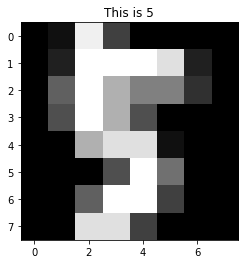

In [2]:
i = 46
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

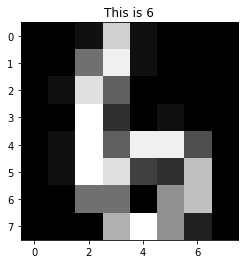

In [3]:
i = 728
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

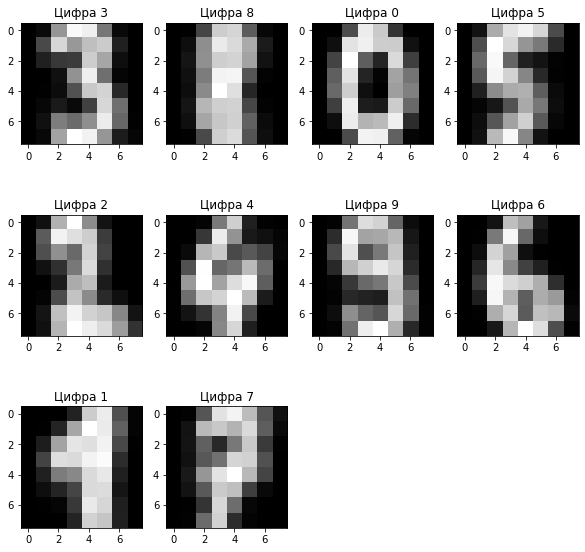

In [38]:
#1
from scipy.cluster.vq import kmeans
from operator import itemgetter
from sklearn.preprocessing import scale
from scipy.cluster.vq import kmeans


def get_labels(pts, centroids):
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def pred_dig(k):
    centroids, score = kmeans(flat_im, k)
    labels = get_labels(flat_im, centroids)
    
    clust_dig = []
    for i in range(k):
        count0=np.bincount(digits.target[labels == i])
        clust_dig.append(np.argmax(count0))
        
    x=(map(clust_dig.__getitem__, labels))
    A_pred = np.array(list(x))
    return A_pred, centroids, clust_dig

flat_im = digits.images.reshape((digits.images.shape[0], -1))
A_pred, centroids, clust_dig = pred_dig(10)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.title('Цифра {}'.format(clust_dig[i]))
    plt.imshow(centroids[i].reshape((8,8)), cmap='gray')

In [52]:
#2
def error_rate(A_init, A_pred):
    err = np.count_nonzero(A_init != A_pred)
    rate = err / A_init.size
    return rate 

print('Error for digit:')
for i in range(10):
    print(i, 'is', error_rate(digits.target[digits.target == i], A_pred[digits.target == i]))

print('Total error is', error_rate(digits.target, A_pred))

Error for digit:
0 is 0.0056179775280898875
1 is 0.6978021978021978
2 is 0.14124293785310735
3 is 0.15846994535519127
4 is 0.09392265193370165
5 is 0.25274725274725274
6 is 0.022099447513812154
7 is 0.027932960893854747
8 is 0.41954022988505746
9 is 0.22777777777777777
Total error is 0.20478575403450194


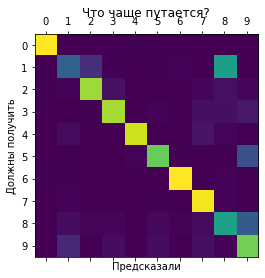

In [65]:
#3
dig_am = max(digits.target.max(), A_pred.max()) + 1
conf_mat =  np.array([[np.count_nonzero((digits.target == i) & (A_pred == j)) for j in range(dig_am)] \
                       for i in range(dig_am)])
plt.matshow(conf_mat)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.title('Что чаще путается?')
plt.ylabel('Должны получить')
plt.xlabel('Предсказали')
plt.show()



In [67]:
# Из таблицы в задании 2 и матрицы в задании 3 видно, что плохо определяются числа 1 (можно принять за 9), 5,
# 8(можно принять за 1) и 9 (можно принять за 5 и 8)

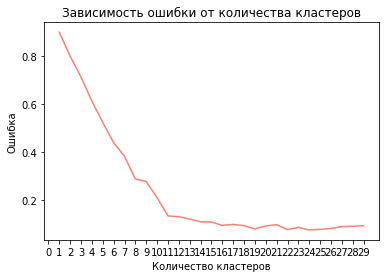

In [81]:
#4
k_range = range(1, 30)
errors = [error_rate(digits.target, pred_dig(k)[0]) for k in k_range]

plt.xticks(np.arange(30))
plt.title('Зависимость ошибки от количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Ошибка')
plt.plot(k_range, errors, color='salmon')

In [76]:
# Из графика видно, что при количестве кластеров менее 11 ошибка достаточно большая, а начиная с 11 
# стабиилизируется и меняется не сильно. Более того, при количестве кластеров 16, 19 и 22 принимает значения еще меньше. 
# Но удобнее взять числа меньше, поэтому хороший выбор - 11, 16 или 19.

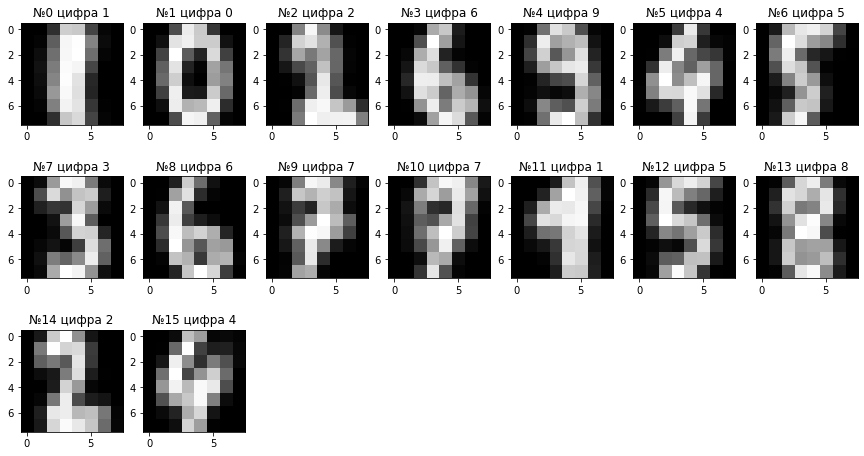

In [102]:
#5
A_pred, centroids, clust_dig = pred_dig(16)

plt.figure(figsize=(15,8))
for i in range(16):
    plt.subplot(3, 7, i + 1)
    plt.title('№{} цифра {}'.format(i, clust_dig[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')

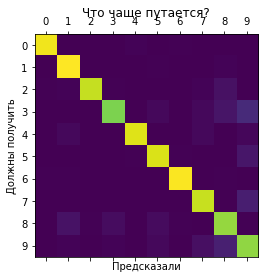

In [100]:
dig_am = max(digits.target.max(), A_pred.max()) + 1
conf_mat =  np.array([[np.count_nonzero((digits.target == i) & (A_pred == j)) for j in range(dig_am)] \
                       for i in range(dig_am)])
plt.matshow(conf_mat)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.title('Что чаще путается?')
plt.ylabel('Должны получить')
plt.xlabel('Предсказали')
plt.show()

In [ ]:
#Мы видим, что матрица стала гораздо "яснее", нет сильных отклонений. На те цифры, которые чаще путались, 
#теперь больше кластеров. Например на 
#1 - 3 кластера,
#2 - 2,
#5 - 2,
#7 - 2,
#8 - 2.
